<H1>ANALISIS DEL COMPORTAMIENTO DE LA DEMANDA DE OCUPACIÓN HOTELERA.<H1/>

Con este analisis se busca mejorar las estrategias para garantizar la ocupación a partir de la toma decisiones acertada en cuanto a 
* Politica de precios 
* Gestión de cancelaciones 
* Anticipación de las reservas

### Etapa 1 : Entendimiento de los datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Cargar CSV
df = pd.read_csv('./data/hotel_bookings_modified.csv')

df.head(10)


C:\Users\jarat\AppData\Local\Temp\ipykernel_4968\1894450639.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/hotel_bookings_modified.csv')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN
5,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN
6,Resort Hotel,0,0,2015.0,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03,NaN
7,Resort Hotel,0,9,2015.0,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03,NaN
8,Resort Hotel,1,85,2015.0,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06,NaN
9,Resort Hotel,1,75,2015.0,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22,NaN


En esta primera visualización podemos entender la unidad minima de analisis la cual es la reserva, no es el cliente ni el hotel, lo cual nos da un contexto del dataset. 
También nos permite revisar la estructura de las columnas y plantear algunas preguntas que permitiran limpiar los datos o avanzar con el entendimiento del problema.

En este punto surgen preguntas como:
* Los valores promedio por noche estan asociados a cancelaciones?
* Las reservas canceladas tienen mes de llegada?
* La variable kids puede resumir a las variables children y babys?
* Existe algun comportamiento de mayor llegada de huespedes en verano? 
* Las personas reservan con mucho tiempo de anterioridad?
* Las personas Prefieren un hoter Resort o un hotel en la ciudad? 
* Los viajes son de negocios y por eso son en la ciudad ? o los viajes son de ocio y por eso son en verano y en hoteles Resort?

1.1. Tamaño del dataframe

In [3]:
# Inspección básica
df.shape              # Filas y columnas

print("El dataframe tiene {} filas y {} columnas.".format(df.shape[0], df.shape[1]))

El dataframe tiene 58895 filas y 33 columnas.


1.2. Inspección de tipos de datos 

In [53]:
df.info()           # Tipos de datos y nulos


<class 'pandas.core.frame.DataFrame'>
Index: 57941 entries, 2 to 58894
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           57941 non-null  object  
 1   is_canceled                     57941 non-null  bool    
 2   lead_time                       57941 non-null  int64   
 3   arrival_date_year               57363 non-null  float64 
 4   arrival_date_month              57941 non-null  category
 5   arrival_date_week_number        57941 non-null  int64   
 6   arrival_date_day_of_month       57941 non-null  int64   
 7   stays_in_weekend_nights         57941 non-null  int64   
 8   stays_in_week_nights            57941 non-null  int64   
 9   adults                          57941 non-null  int64   
 10  children                        57937 non-null  float64 
 11  babies                          57941 non-null  int64   
 12  meal                   

Esta inspección nos permite identificar datos con muchos nulos como kids y company, que si bien pueden ser variables utiles para analisis particulares, no son relevante para entender el comportamiento de la generalidad de las reservas.

Adicionalmente nos permite identificar la necesidad de algunos ajustes que deben realizarse en la etapa de limpieza y enriquecimiento. Entre ellos:

* is_canceled es una variable de tipo entero que puede transformarse a bool para facilitar la lectura e interpretación.
* lead_time es una variable cuantitativa discreta que puede enriquecerse como cualitativa ordinal que permite darle una lectura propia del negocio hotelero.
* arrival_date_month es una variable categorica que puede enriquecerse dandole un caracter de categorica ordinal

Adicionalmente adjuntamos un diccionario enriquecido con los tipos de variable estadistica, resaltando a priori las variables que consideramos relevantes sin embargo no todas se usarán en el analisis:

![Texto alternativo](tabla_tipos_datos.jpg)




### Etapa 2: Limpieza y enriquecimiento del dataset.

** Revision de variables categoricas **

C:\Users\jarat\AppData\Local\Temp\ipykernel_4968\1482396133.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_canceled'] = df['is_canceled'].replace({0: False, 1: True})
C:\Users\jarat\AppData\Local\Temp\ipykernel_4968\1482396133.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_repeated_guest'] = df['is_repeated_guest'].replace({0: False, 1: True})


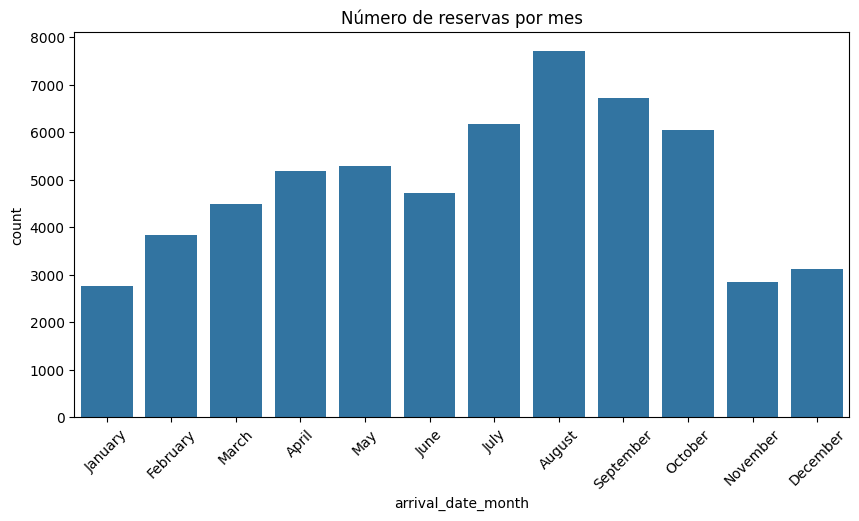

In [5]:
# Se convertirá la columna de cancelación a valores booleanos
df['is_canceled'] = df['is_canceled'].replace({0: False, 1: True})

# Se corrigen valores atípicos en la fecha de llegada
df['arrival_date_year'] = df['arrival_date_year'].replace({20016.: 2016.})

# Se convertirá la columna si el husped ya se había alojado previamente
df['is_repeated_guest'] = df['is_repeated_guest'].replace({0: False, 1: True})

# Inspeccionar valores unicos de arrival_date_month
df['arrival_date_month'].unique()

# Convertir la columna a categórica ordinal
df['arrival_date_month'] = pd.Categorical(
    df['arrival_date_month'],
    categories=["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"],
    ordered=True
)

# Ahora podemos graficar la variable arrival_date_month de forma ordenada
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='arrival_date_month', order=df['arrival_date_month'].cat.categories)
plt.xticks(rotation=45)
plt.title("Número de reservas por mes")
plt.show()

In [ ]:
# revision de valores unicos par variables cualitativas
print(df.select_dtypes(include=['object', 'category']).columns)

print(df['hotel'].unique())

print(df['arrival_date_month'].unique())  

print(df['meal'].unique()) 

print(df['customer_type'].unique())  

print(df['assigned_room_type'].unique())  

print(df['deposit_type'].unique())  

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'company', 'customer_type', 'reservation_status',
       'reservation_status_date', 'tipo_reserva'],
      dtype='object')
['Resort Hotel' 'City Hotel']
['July', 'August', 'September', 'October', 'November', ..., 'February', 'March', 'April', 'May', 'June']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Transient' nan 'Contract' 'Transient-Party' 'Group']
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
['No Deposit' 'Refundable' 'Non Refund' 'No Refund']


Podemos evidenciar que las variables categoricas son consistentes y podemos avanzar si realizar actividades de limpieza para ellas. Es llamativo que para la variable customer type existen valores en nan, los cuales tendriamos que entrar a validar y trabajar de forma especial si decidimos trabajar con esta varaible.

** Revision de variables cuantitativas ** 

* ADR

In [6]:
#Estadisticas descriptivas de la variable adr para evidenciar posibles valores atipicos
df['adr'].describe()

count    58894.000000
mean        96.250426
std         58.555599
min         -6.380000
25%         60.000000
50%         84.000000
75%        120.000000
max       5400.000000
Name: adr, dtype: float64

In [7]:
# Remplazo de valor negativo
df['adr'] = df['adr'].replace({-6.38: 6.38})

Podemos evidenciar que la variable adr presenta una mediana cercana a su media a pesar del valor maximo de 5400, esto nos puede dar indicios de que se trata de un valor maximo atipico y podria tratarse de un hotel de lujo o un dato mal digitado. 

También optamos por remplazar el valor negativo teniendo en cuenta que no deberian existir valores promedio por noche en negativo.


In [8]:
#Revisión de valores en cero en relación con las cancelaciones
df.loc[df['adr'] ==0]['is_canceled'].value_counts(normalize=True)

is_canceled
False    0.865828
True     0.134172
Name: proportion, dtype: float64

In [9]:
df.loc[df['adr'] ==0].shape[0] / df.shape[0]  # Porcentaje de datos con adr en 0

0.01619831904236353

Realizando esta agrupación podemos ver que los valores de 0 no necesariamente estan asociados a cancelaciones, lo que puede mostrarnos que estos datos son valores erroneos o que se trata de promociones otorgadas en la reserva dado que también coincide con un 13% de cancelaciones que nos da indicios de que los clientes no cancelan un beneficio otorgado. Para este caso vamos a ignorar estos datos dado que no es fruto del analisis considerar promociones brindadas y teniendo en cuenta que la cantidad de datos nulos es baja 954 datos  -> 1% de los datos

In [10]:
df = df[df['adr'] != 0]  # Filtrar filas donde adr no es 0
df.shape
print("El dataframe tiene ahora {} filas y {} columnas.".format(df.shape[0], df.shape[1]))

El dataframe tiene ahora 57941 filas y 33 columnas.


* lead_time

In [11]:
# Estadisticas descriptivas para lead_time y evidenciar necesidad de limpieza
df[["lead_time"]].describe()


,lead_time
count,57941.000000
mean,100.858218
std,101.174362
min,0.000000
25%,17.000000
50%,70.000000
75%,158.000000
max,709.000000


La variable **lead_time** muestra un promedio de 100 dias, valor que se encuentra a la derecha de la mediana lo que muestra una distribución asimetrica a la derecha lo que quiere decir que hay valores altos jalando la media pero el 75% de datos se encuentran en valores por debajo de 157 dias.

Para enriquecer el dataframe y permitir analisis entre variables cualittivas vamos a calcular una variable categorica a partir de lead_time. Esto lo podemos realizar a partir de premisas del negocio o apartir de comportamiento estadistico.

Queremos determinar 4 grupos
* Reserva de ultimo minuto (0 a 7 dias)
* Reserva de corto plazo ( 8 a 30 dias )
* Reserva de mediano plazo (31 a 90 dias)
* Reserva de largo plazo ( mas de 90 dias ) 



In [12]:
# Definimos los intervalos (bins) y las etiquetas
bins = [0, 7, 30, 90, float("inf")]
labels = ["Ultimo Minuto", "Corto Plazo", "Mediano Plazo", "Largo Plazo"]

# Creamos la nueva columna categórica
df["tipo_reserva"] = pd.cut(df["lead_time"], bins=bins, labels=labels, include_lowest=True)

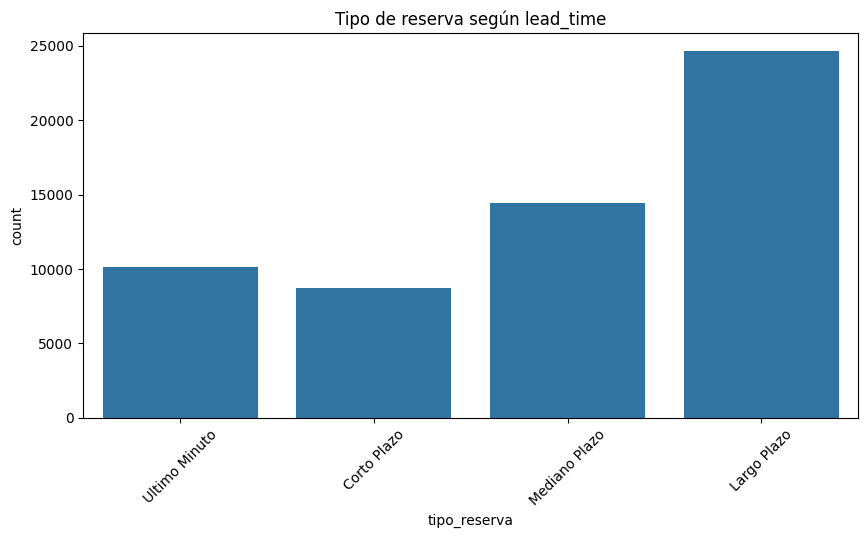

In [13]:
# Ahora podemos graficar la variable arrival_date_month de forma ordenada
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='tipo_reserva', order=labels)
plt.xticks(rotation=45)
plt.title("Tipo de reserva según lead_time")
plt.show()

### Etapa 3 y Etapa 4

En estas etapas buscamos direccionar el entendimiento del negocio a partir de la resolución de preguntas mediante analisis univariado y bivariado sobre las variables priorizadas:

- **hotel**: indica si el hotel es rural o urbano
- **is_canceled**: indica si la reserva fue cancelada
- **lead_time**: cuántos días han pasado entre que se crea la reserva y la fecha de llegada
- **adr**: tarifa promedio por día
- **arrival_date_month**: mes de llegada

### Variable: Hotel

In [14]:
df['hotel'].value_counts(normalize=True)
# El 67 por ciento de las reservas son para hotel tipo resort

hotel
Resort Hotel    0.678483
City Hotel      0.321517
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

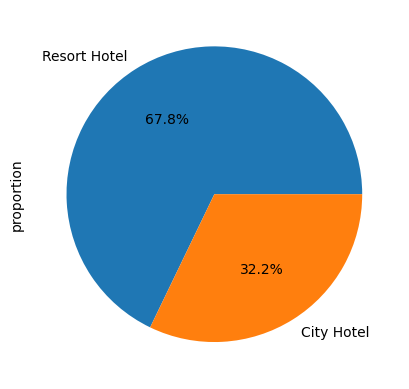

In [15]:
df['hotel'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

### Variable is_canceled

In [16]:
df['is_canceled'].value_counts(normalize=True)  # Para categóricas


is_canceled
False    0.584042
True     0.415958
Name: proportion, dtype: float64

In [17]:
# Proporcion de cancelaciones por tipo de hotel 
pd.crosstab(df['hotel'], df['is_canceled'],normalize='index')

is_canceled,False,True
hotel,,
City Hotel,0.298889,0.701111
Resort Hotel,0.719170,0.280830


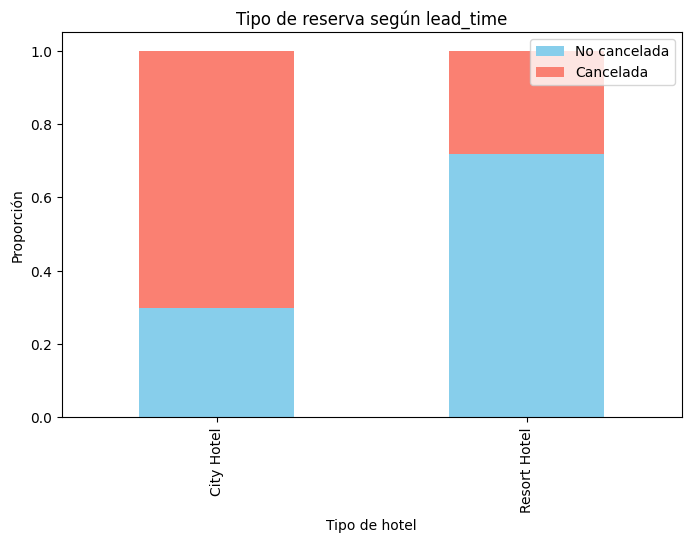

In [18]:

ct = pd.crosstab(df['hotel'], df['is_canceled'], normalize='index')

ct.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue', 'salmon'])
plt.ylabel("Proporción")
plt.xlabel("Tipo de hotel")
plt.legend(["No cancelada", "Cancelada"], loc="upper right")
plt.title("Tipo de reserva según lead_time")
plt.show()


Se puede evidenciar que la muestra contiene un 58% reservas efectivas y un restante de 41% canceladas. Esto se puede interpretar cono una muestra balanceada, sin embargo, al momento de validar que tipo de hotel presenta mayor porcentaje de cancelaciones esto si se hace evidente obteniendo para los hoteles de ciudad un porcentaje de cancelacion del 70 %. Es posible que estas cancelaciones se presenten en un meses del año especificos?

### Variable lead_time

In [19]:
df["lead_time"].describe()  # Para numéricas

count    57941.000000
mean       100.858218
std        101.174362
min          0.000000
25%         17.000000
50%         70.000000
75%        158.000000
max        709.000000
Name: lead_time, dtype: float64

La variable **lead_time** muestra un promedio de 100 dias, valor que se encuentra a la derecha de la mediana lo que muestra una distribución asimetrica a la derecha lo que quiere decir que hay valores altos jalando la media pero el 75% de datos se encuentran en valores por debajo de 157 dias.

In [20]:
df["lead_time"].mode()  # Para numéricas

0    0
Name: lead_time, dtype: int64

Podemos ver que a pesar de en el diagrama de barras realizado previamente en donde se veian las reservas de largo plazo predominando sobre las demas, aqui evidenciamos que el valor que mas se repite para lead_time es el 0 lo que evidencia que tambien existe un numero considerable de personas acceden al hotel el dia que lo visitan.

Text(0.5, 1.0, 'Distribución de lead_time')

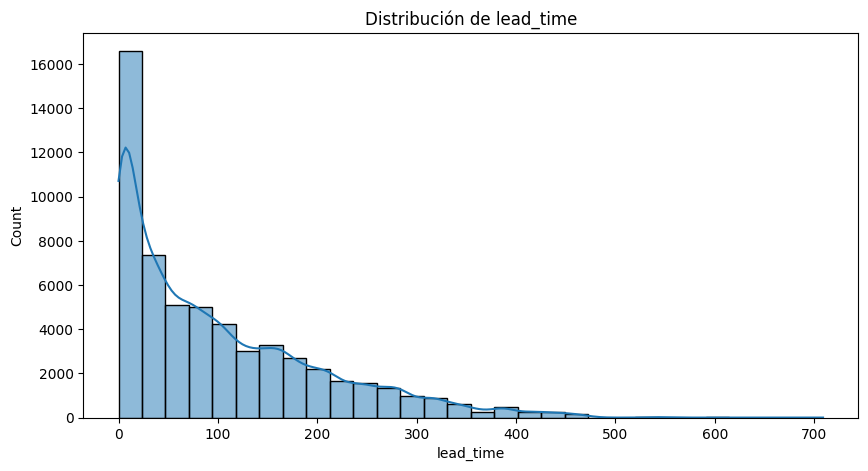

In [21]:
# Para determinar los mejores intervalos para lead_time, se puede usar un histograma
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='lead_time', bins=30, kde=True)
plt.title("Distribución de lead_time")




El histograma nos permite evidenciar que el comportamiento que predomina es el de los clientes que reservan con poca anticipacion, sin embargo hay un 50% de reservas que evidencian un comportamiento de  planeacion de mediano y largo plazo, es decir mayor 70 dias de antelacion.

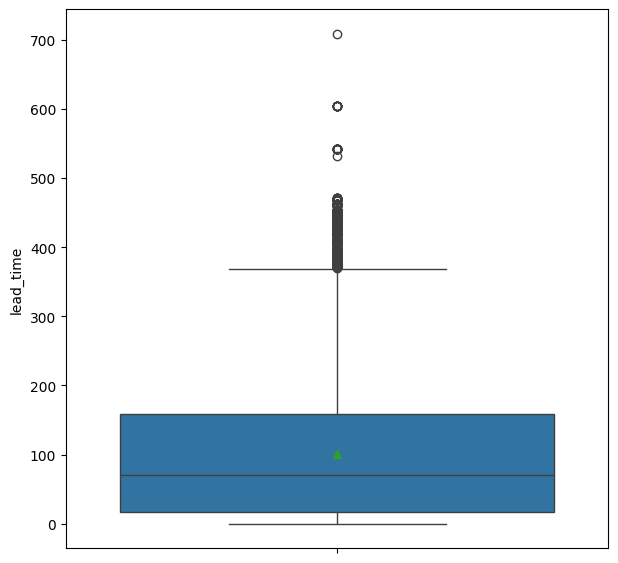

In [22]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df,
    y='lead_time',
    showmeans=True
)
plt.show()

Al realizar el box plot evidenciamos que se presentan como atipicos los datos de las reservas realizadas con mayor anticipacion sin embargo estos datos pueden estar mostrando la realidad del negocio.

In [23]:
# Realizamos un filtro para eliminar los atipicos a partir de la regla de IQR 
# para evidenciar si existen cambios significativos en las estadisticas descriptivas
df.loc[df['lead_time']<= (155+1.5*(155-11))]['lead_time'].describe()

count    56722.000000
mean        94.063044
std         90.725953
min          0.000000
25%         17.000000
50%         68.000000
75%        151.000000
max        371.000000
Name: lead_time, dtype: float64

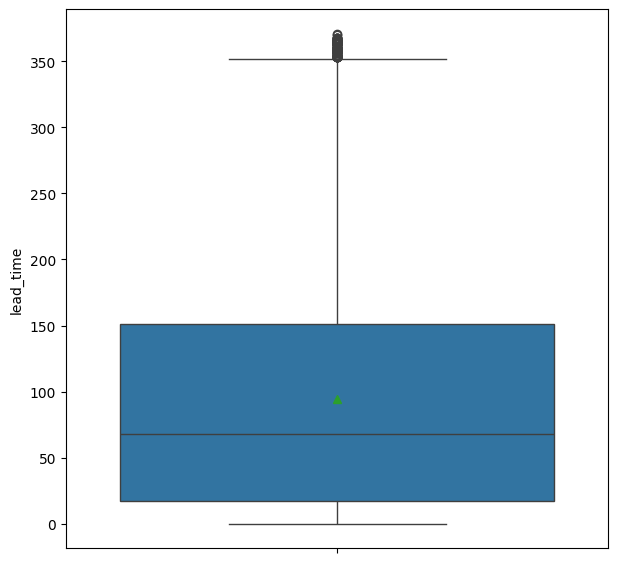

In [24]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df.loc[df['lead_time']<= (155+1.5*(155-11))],
    y='lead_time',
    showmeans=True
)
plt.show()

Despues de quitar atipicos a partir de la regla de IQR vemos que la distribucion sigue sesgada a la derecha, mostrando que el comportamiento de los clientes si es realizar su reserva en el corto plazo y mediado plazo, es decir a menos de dos meses de su estadia. Esto sugiere que el mercado natural del hotel son reservas de corto plazo, pero el segmento de largo plazo puede ser estratégico.

Estadisticas se mantienen similares

In [25]:
df.groupby('is_canceled')['lead_time'].agg(['mean', 'max', 'min', 'std', 'median', 'count'])


,mean,max,min,std,median,count
is_canceled,,,,,,
False,80.202453,709,0,91.541124,44.0,33840
True,129.860794,605,0,106.785235,102.0,24101


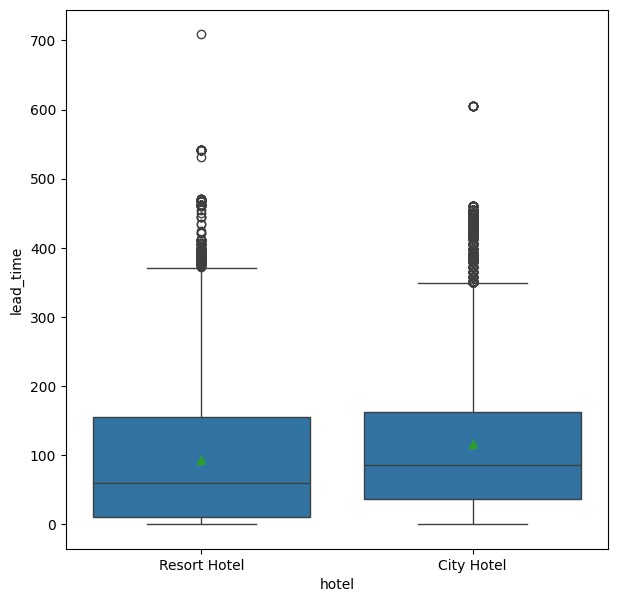

In [26]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df,
    x='hotel',
    y='lead_time',
    showmeans=True
)
plt.show()

Se evidencia que las reservas a corto y mediano plazo son predominantes en los dos hotele

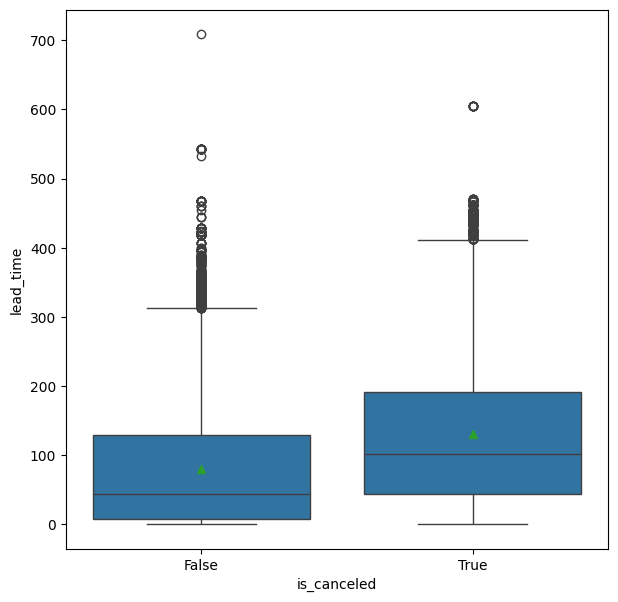

In [27]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df,
    x='is_canceled',
    y='lead_time',
    showmeans=True
)
plt.show()


# la t parece que no daria significativa porque se solapan mucho 
# podria suponer que las reservas con lead time muy alto tienen mas probabilidad de ser canceladas  
# pero el box plot no lo evidencia claramente


<Axes: xlabel='lead_time', ylabel='Count'>

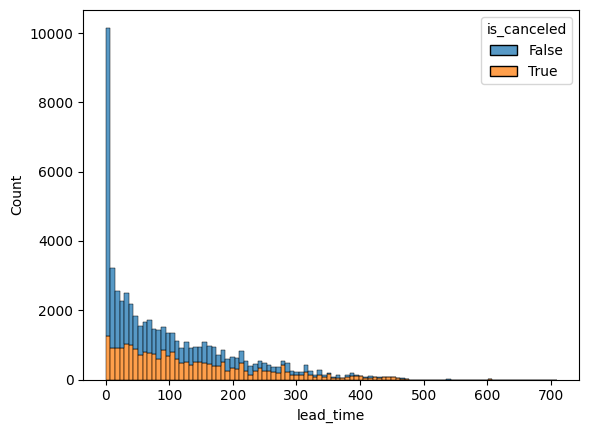

In [28]:
sns.histplot(data=df, x='lead_time', hue='is_canceled', multiple='stack')

<Axes: xlabel='is_canceled', ylabel='adr'>

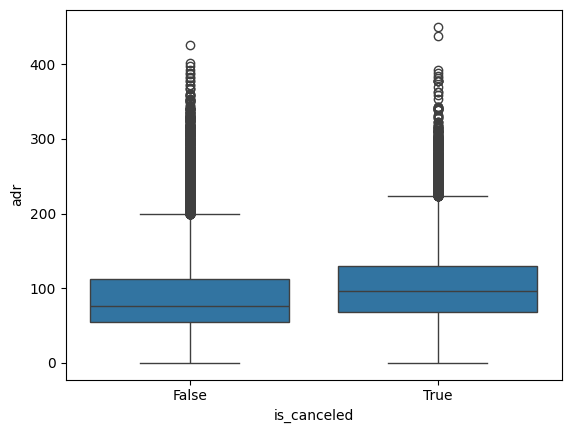

In [29]:
sns.boxplot(x='is_canceled', y='adr', data=df.loc[df['adr'] < 500])

<Axes: xlabel='arrival_date_month', ylabel='adr'>

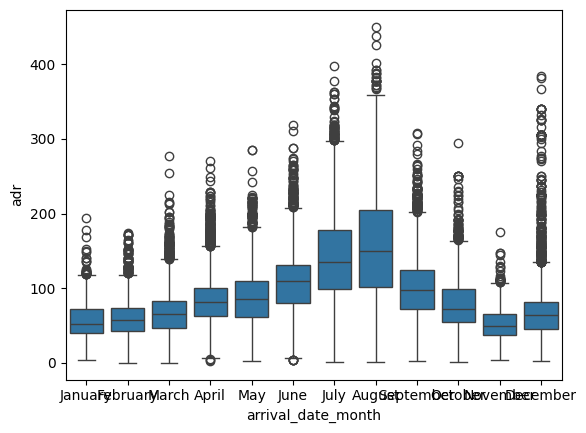

In [30]:
sns.boxplot(x='arrival_date_month', y='adr', data=df.loc[df['adr'] < 500])

las reservas grandes tienen relacion con precios altos?


In [31]:
df.loc[df['lead_time']>365]['adr'].describe()

count    1230.000000
mean       65.509244
std        19.050835
min         4.000000
25%        62.000000
50%        62.000000
75%        68.000000
max       450.000000
Name: adr, dtype: float64

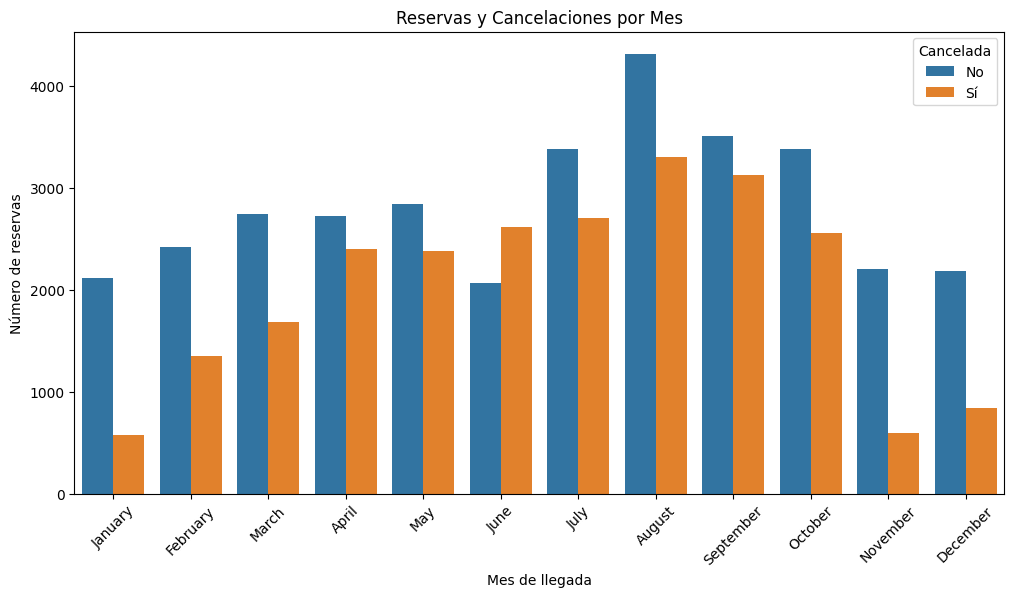

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='arrival_date_month',
    hue='is_canceled',   # barras paralelas por cancelada / no cancelada
    order=df['arrival_date_month'].cat.categories
    )

plt.xticks(rotation=45)
plt.title("Reservas y Cancelaciones por Mes")
plt.xlabel("Mes de llegada")
plt.ylabel("Número de reservas")
plt.legend(title="Cancelada", labels=["No", "Sí"])
plt.show()


de pronto podemos hablar de proporciones 

In [33]:
# # Estadísticas básicas (numéricas)
df.select_dtypes(include=float).describe()         


#arreglar chilren porque deberia ser entero
#agent tampoco es float es id



df['required_car_parking_spaces'].unique()

df['days_in_waiting_list'].unique()




array([  0.,  50.,  47.,  65., 122.,  75., 101., 150., 125.,  14.,  60.,
        34., 100.,  22., 121.,  61.,  39.,   5.,   1.,   8., 107.,  43.,
        52.,  11., 142.,   2., 116.,  13.,  44.,  97.,  83.,   4., 113.,
        18.,  20., 185.,  93., 109.,   6.,  37., 105., 154.,  64.,  99.,
        38.,  48.,  33.,  77.,  21.,  80.,  59.,  40.,  58.,  89.,  53.,
        49.,  69.,  87.,  91.,  57., 111.,  79.,  98.,  85.,  63.,  15.,
         3.,  41., 224.,  31.,  56., 187., 176.,  71.,  55.,  96., 236.,
       259., 207., 215., 160., 120.,  30.,  32.,  27.,  62.,  24., 108.,
       147., 379.,  70.,  35., 178., 330., 223., 174., 162., 391.,  68.,
        nan])

In [34]:




df.describe(include='object')  # Para categóricas


,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,company,customer_type,reservation_status,reservation_status_date
count,57941,57941,57476,57941,57941,57941,57941,57941,3345.0,57360,57366,57940
unique,2,5,141,8,5,9,11,4,271.0,4,3,919
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,223.0,Transient,Check-Out,2015-10-21
freq,39312,44342,26840,25527,45843,38471,31054,51379,771.0,41776,33477,965


<Axes: >

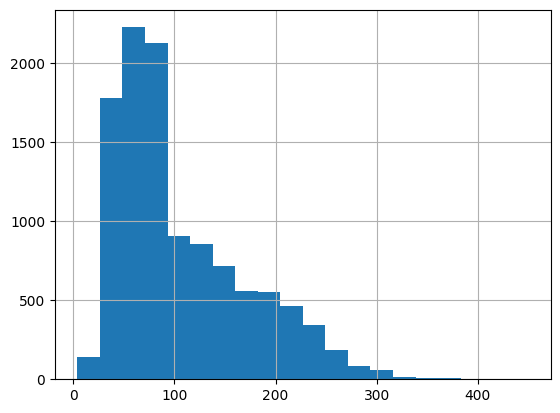

In [35]:
df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)]['adr'].hist(bins=20)


<Axes: >

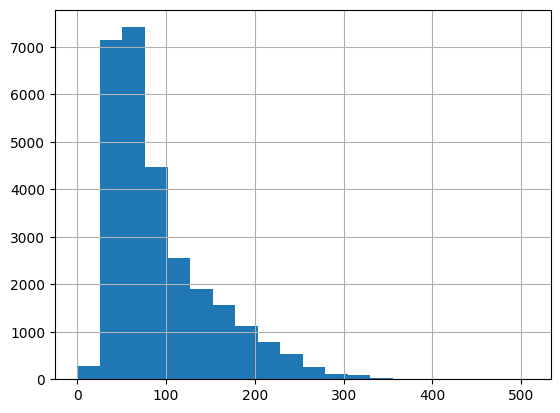

In [36]:
df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]['adr'].hist(bins=20)


<Axes: >

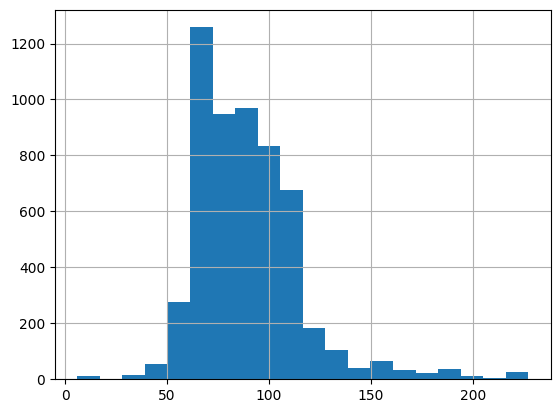

In [37]:
df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]['adr'].hist(bins=20)



In [38]:
df.loc[df['hotel'].isin(['City Hotel'])]['adr'].sort_values(ascending=False)

df.loc[df['hotel'].isin(['City Hotel'])].sort_values('adr',ascending=False)# volaria ese dato


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,tipo_reserva
48515,City Hotel,True,35,2016.0,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,1,Non Refund,12.0,NaN,0.0,Transient,5400.00,0.0,0.0,Canceled,2016-02-19,NaN,Mediano Plazo
57007,City Hotel,True,11,2016.0,September,38,16,1,2,2,2.0,0,HB,FRA,Online TA,TA/TO,False,0,0,F,F,0,No Deposit,9.0,NaN,0.0,Transient,306.00,0.0,0.0,Canceled,2016-09-08,NaN,Corto Plazo
54479,City Hotel,True,21,2016.0,July,30,17,2,1,4,0.0,0,BB,PRT,Online TA,TA/TO,False,0,0,G,G,0,No Deposit,8.0,NaN,0.0,Transient,299.33,0.0,0.0,Canceled,2016-07-07,NaN,Corto Plazo
57856,City Hotel,True,26,2016.0,October,40,1,2,2,2,2.0,0,HB,BEL,Online TA,TA/TO,False,0,0,F,F,0,No Deposit,9.0,NaN,0.0,Transient,294.00,0.0,2.0,Canceled,2016-09-16,NaN,Corto Plazo
55694,City Hotel,True,22,2016.0,August,34,19,0,2,2,2.0,0,HB,ESP,Online TA,TA/TO,False,0,0,F,F,0,No Deposit,9.0,NaN,0.0,Transient,288.00,0.0,2.0,Canceled,2016-08-02,NaN,Corto Plazo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47642,City Hotel,True,116,2016.0,February,10,28,2,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,134.0,NaN,0.0,Transient-Party,1.00,0.0,0.0,No-Show,2016-02-28,NaN,Largo Plazo
47466,City Hotel,True,4,2016.0,February,9,23,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,6.0,NaN,0.0,Transient,1.00,0.0,0.0,Canceled,2016-02-23,NaN,Ultimo Minuto
47661,City Hotel,True,116,2016.0,February,10,28,2,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,134.0,NaN,0.0,Transient-Party,1.00,0.0,0.0,No-Show,2016-02-28,NaN,Largo Plazo
47427,City Hotel,True,37,2016.0,February,8,20,4,8,1,0.0,0,BB,AGO,Online TA,TA/TO,False,0,0,A,A,1,No Deposit,9.0,NaN,0.0,Transient,0.50,0.0,0.0,Canceled,2016-01-18,NaN,Mediano Plazo


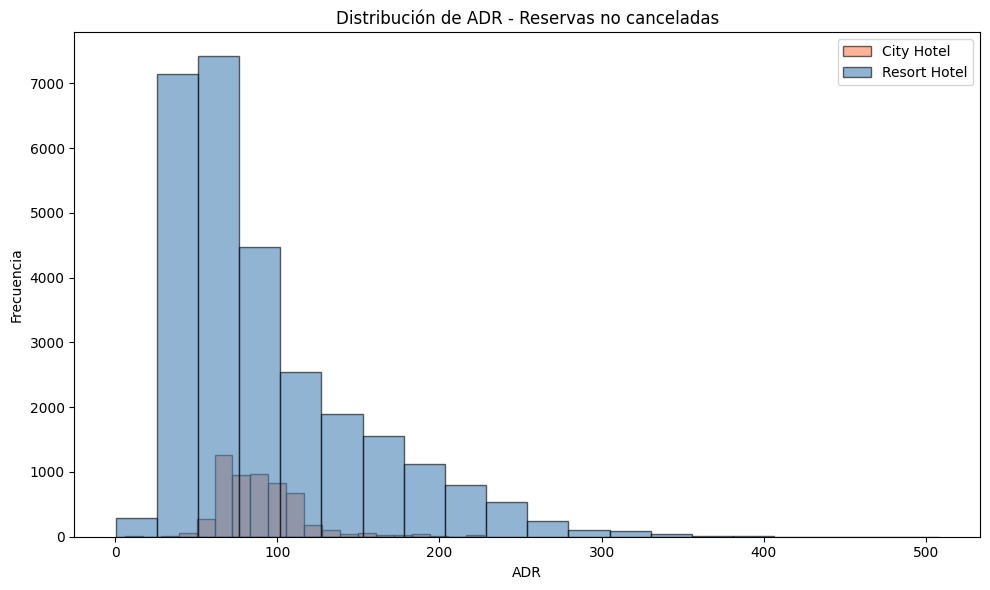

In [39]:
import matplotlib.pyplot as plt

# Filtrar los datos
city_adr = df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0), 'adr']
resort_adr = df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0), 'adr']

# Crear el histograma solapado
plt.figure(figsize=(10,6))
plt.hist(city_adr, bins=20, alpha=0.6, label='City Hotel', color='coral', edgecolor='black')
plt.hist(resort_adr, bins=20, alpha=0.6, label='Resort Hotel', color='steelblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de ADR - Reservas no canceladas')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
## hacer esta misma grafica pero con cancelado y no cancelado